# SED Processing of CIGALE SED Decomposition fits
This script is used to explore and proccess some of the outputs from the fits files generated by the CIGALE SED decomposition. We intend for this to explore the AGN contribution with a more robust set of tools to see how AGN contamination effects UVJ and other diagnostics.

In [128]:
# Import all required packages
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# refresh

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
# The aim of this is to see how the SEDs of the galaxies are
# to this end what we do is read in some of the fits files
# Begin by importing just one of the fits files
gal_name= '9367_best_model.fits'
galaxy_path = os.path.join('datasets\student_fits_files\cdfs_best_models_fits', gal_name)
    
# Open the fits files <- needs to be different for CAT vs Fits files
with fits.open(galaxy_path) as data:
    df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())

In [130]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')


pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [131]:
df # We recall wavelength is in nanometers, we would like to immediately convert this to angstroms




df['wavelength'] = df['wavelength']*10

# For plotting reasons, convert to Janksys
# We are already in mJanksys
df['Snu'] = df['Fnu']*10**-3

# Converting into F_lambda
df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2)

In [132]:
df

wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.902700e+01  0.000000    0.000000e+00          0.0            0.0   
1     2.184592e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.508247e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.879853e+01  0.000000    0.000000e+00          0.0            0.0   
4     3.306514e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
4770  1.850846e+10  0.000016    6.134977e+18          0.0            0.0   
4771  1.859389e+10  0.000016    6.081121e+18          0.0            0.0   
4772  1.867972e+10  0.000016    6.027728e+18          0.0            0.0   
4773  1.885256e+10  0.000016    5.922350e+18          0.0            0.0   
4774  1.902700e+10  0.000016    5.818814e+18          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0                0.0   
1                        0.0                       0.0                0.0   
2                        0.0                       0.0                0.0   
3                        0.0                       0.0                0.0   
4                        0.0                       0.0                0.0   
...                      ...                       ...                ...   
4770                     0.0                       0.0                0.0   
4771                     0.0                       0.0                0.0   
4772                     0.0                       0.0                0.0   
4773                     0.0                       0.0                0.0   
4774                     0.0                       0.0                0.0   

      nebular.lines_young  nebular.continuum_old  ...  \
0                     0.0           0.000000e+00  ...   
1                     0.0           0.000000e+00  ...   
2                     0.0           0.000000e+00  ...   
3                     0.0           0.000000e+00  ...   
4                     0.0           0.000000e+00  ...   
...                   ...                    ...  ...   
4770                  0.0           5.923701e+16  ...   
4771                  0.0           5.871700e+16  ...   
4772                  0.0           5.820146e+16  ...   
4773                  0.0           5.718397e+16  ...   
4774                  0.0           5.618426e+16  ...   

      attenuation.nebular.lines_young  attenuation.nebular.continuum_old  \
0                                 0.0                       0.000000e+00   
1                                 0.0                       0.000000e+00   
2                                 0.0                       0.000000e+00   
3                                 0.0                       0.000000e+00   
4                                 0.0                       0.000000e+00   
...                               ...                                ...   
4770                             -0.0                      -7.814515e+06   
4771                             -0.0                      -7.688700e+06   
4772                             -0.0                      -7.564892e+06   
4773                             -0.0                      -7.323233e+06   
4774                             -0.0                      -7.089303e+06   

      attenuation.nebular.continuum_young  dust  agn.SKIRTOR2016_torus  \
0                            0.000000e+00   0.0                    0.0   
1                            0.000000e+00   0.0                    0.0   
2                            0.000000e+00   0.0                    0.0   
3                            0.000000e+00   0.0                    0.0   
4                            0.000000e+00   0.0                    0.0   
...                                   ...   ...                    ...   
4770                        -8.015084e+08   0.0       

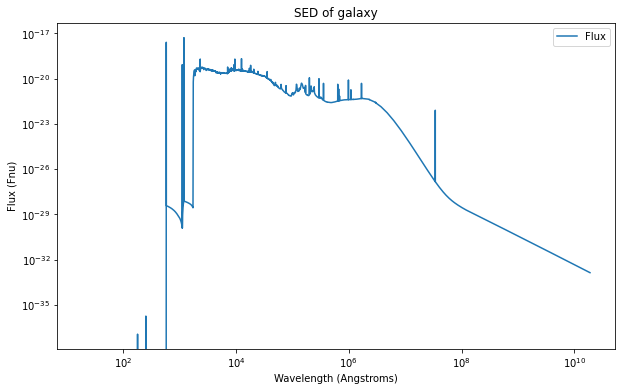

In [133]:

# Only plot between 10^3 and 10^5

# Do a logplot of the lines 
plt.figure(figsize=(10, 6))
plt.loglog(df['wavelength'], df['Flambda'], label='Flux')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Fnu)')
# Change the limits from 10^3 to 10^5


#plt.ylim(1e-2, 1e2)


plt.title('SED of galaxy')
plt.legend()
plt.show()


In [134]:
# We can see that this kind of works. What we would now like to do, is extend this idea to a few more galaxies. Instead
# of one. We can read in say n number of galaxies, convert to what we use and then plot them all together
# We will be able to see that these galaxies are not restframed, we need to use the exported zpk from a previous file 
# to restframe them.

# Reading in the file containing the id's plus, filed, plus redshift
queiscent_transitions = pd.read_csv('outputs\quiescent_transition_ids.csv')

In [135]:
queiscent_transitions

# we can use something like this
# wavelengths = wavelengths / (1 + float(selected_redshifts[z_id]))

id     zpk field
0    22468  1.6739  CDFS
1    16807  1.5228  CDFS
2    11281  1.5864  CDFS
3    10413  1.5003  CDFS
4    13143  1.4925  CDFS
..     ...     ...   ...
434  13883  0.8058   UDS
435   1887  0.4364   UDS
436  17475  1.0974   UDS
437  19012  0.4129   UDS
438  14976  1.0550   UDS

[439 rows x 3 columns]

In [136]:
# now doing this lets select 5 galaxies, and plot their SEDS

# We will use the same code as above, but we will put it in a function, and then call this function for each of the galaxies
# that we have selected

def get_n_seds(n, restframe=False, all=False):
    # Select n galaxies
    
    df_list = []
    names = []
    redshifts = []
    if all==False:
        selected_galaxies = queiscent_transitions.sample(n)
    else: 
        selected_galaxies = queiscent_transitions
        
    # Reset the index
    selected_galaxies = selected_galaxies.reset_index(drop=True)
    
    # name 
    gal_name = selected_galaxies['id'].astype(str)
    
    # field
    gal_field = selected_galaxies['field'].astype(str)
    
    
    names = gal_field + '_' + gal_name
    gal_redshift = selected_galaxies['zpk'].astype(float)

    # Now we will read in the fits files for these galaxies

    for i in range(len(selected_galaxies)):
        path = 'datasets\student_fits_files\\'+ str(gal_field[i]).lower() +'_best_models_fits\\'
        name = str(gal_name[i])+'_best_model.fits'

        galaxy_path = os.path.join(path, name)
        with fits.open(galaxy_path) as data:
            df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())
        
        # Convert to angstroms
        df['wavelength'] = df['wavelength']*10

        if restframe:
            df['Snu'] = df['Fnu']*10**-3 # milliJanksys to Janksys <- J = ergs/(s*(cm^2)*(s^-1))
            # F_nu currently has a frequency dependence, convert to nuFnu by multiplying the the frequency associated
            # with the wavelength, as we are in angstroms, we can use the formula c = f*lambda
            
            
            # This should prevent any issues, but check
            freq = (3*10**18)/df['wavelength'] # in Hz
            # multiply the Snu * nu to get nuSnu
            df['nuSnu'] = df['Snu']*freq
            # Restframe the values of wavelength
            df['wavelength'] = df['wavelength'] / (1 + gal_redshift[i]) # we redshift the values of of wavelength
            # now calculate a new frequency, based on the new wavelength
            freq = (3*10**18)/df['wavelength'] # in Hz
            # divide the nuSnu by the new frequency to get the restframed values
            df['Snu'] = df['nuSnu']/freq
            
            # Convert flux values
            df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2) # S_nu to F_lambda <- angstroms 
            
        else:
            # Convert flux values
            df['Snu'] = df['Fnu']*10**-3 # milliJanksys to Janksys <- J = ergs/(s*(cm^2)*(s^-1))
            df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2) # S_nu to F_lambda <- angstroms 
            
        
            
            
        redshift_Val = gal_redshift[i]
        redshifts.append(redshift_Val)        
        
        

        
        # For simplicity, just create some extra columns
        df['lambda (Angstroms)'] = df['wavelength']
        df['Total Flux (erg/s/cm^2/Angstrom)'] = df['Flambda']
        
        
        
        df_list.append(df)
        
        
        plt.loglog(df['wavelength'], df['Flambda'])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux (Fnu)')
    #plt.xlim(1e3, 1e5)
    plt.ylim(1e-30, 1e-2)
    plt.title('SED of galaxies')
    plt.legend()
    plt.show()
    
    print(len(df_list))
    
    return df_list, names, redshifts

No handles with labels found to put in legend.


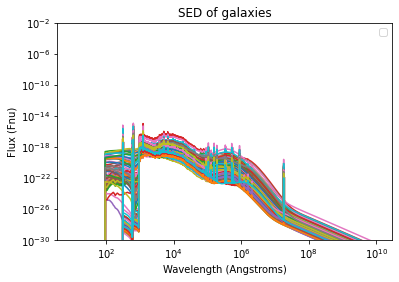

100


([        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
  0     1.000000e+01  0.000000    0.000000e+00          0.0            0.0   
  1     1.148154e+01  0.000000    0.000000e+00          0.0            0.0   
  2     1.318257e+01  0.000000    0.000000e+00          0.0            0.0   
  3     1.513561e+01  0.000000    0.000000e+00          0.0            0.0   
  4     1.737801e+01  0.000000    0.000000e+00          0.0            0.0   
  ...            ...       ...             ...          ...            ...   
  4770  9.727472e+09  0.000192    1.817172e+20          0.0            0.0   
  4771  9.772370e+09  0.000192    1.801220e+20          0.0            0.0   
  4772  9.817479e+09  0.000192    1.785405e+20          0.0            0.0   
  4773  9.908319e+09  0.000192    1.754192e+20          0.0            0.0   
  4774  1.000000e+10  0.000192    1.723525e+20          0.0            0.0   
  
        nebular.absorption_old  nebular.absorption_young  neb

In [137]:
get_n_seds(100, restframe=True)

We can see by using this code that we can read in the 'best fit' models of these SEDS and rest frame them using their zpk value. Now we can extend this code as required

No handles with labels found to put in legend.


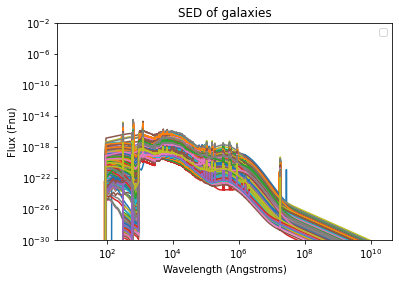

439


In [138]:
best_fit_seds, names, redshifts = get_n_seds(100, restframe=True, all=True)



In [139]:
# we will use astSED to generate the colours right here



In [140]:
len(best_fit_seds)

439

In [141]:
len(names)
names

0      CDFS_22468
1      CDFS_16807
2      CDFS_11281
3      CDFS_10413
4      CDFS_13143
          ...    
434     UDS_13883
435      UDS_1887
436     UDS_17475
437     UDS_19012
438     UDS_14976
Length: 439, dtype: object

In [142]:
# For simplicity, for each of the names, have a dictionary entry with the associated dataframe
# This will make it easier to access the dataframes
# We will also convert the names to a list
names = names.tolist()


In [143]:
# names

# # setting up the dictionary
# best_fit_seds_dict = dict(zip(names, best_fit_seds))


In [144]:
# best_fit_seds_dict

In [145]:
# Seperately we would like to just acces best_fit_seds
# best_fit_seds


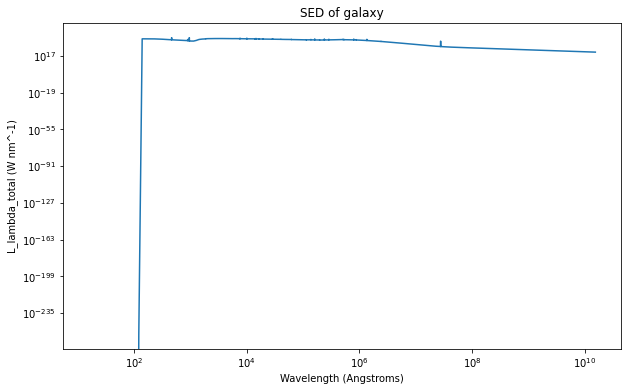

In [146]:
# Lets just explore the first restframed galaxy with everything plotted
sed_0 = best_fit_seds[0]


plt.figure(figsize=(10, 6))
plt.loglog(sed_0['wavelength'], sed_0['L_lambda_total'], label='')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('L_lambda_total (W nm^-1)')
#plt.ylim(1e-30, 1e-2)
plt.title('SED of galaxy')
plt.show()

Happily we see the best fit SEDS are correct in terms of their restframed shape and position. This means that these SEDS can therefore be used. But this is not all as we also need to explore the other ontributions
which are shown in the dataframe
best_fit_seds

In [147]:
# we are going to try and plot the SEDs to see the differences, and export an ID, and UVJ colours (recalling UVJ are inherently restframed)
# We will use a similar techinques as previous scripts have done
# Using our previous technique


# Get one de-redshifted template
# We will use the selection of them
best_fit_seds

[        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
 0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
 1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
 2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
 3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
 4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
 ...            ...       ...             ...          ...            ...   
 4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
 4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
 4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
 4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
 4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   
 
       nebular.absorption_old  nebular.absorption_young  nebular.lines_old

In [148]:
# Now we would like to, for each of the templates calculate a colour
# -  now we can go and have a look, creating colours are required

best_fit_seds[0]


wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0                0.0   
1                        0.0                       0.0                0.0   
2                        0.0                       0.0                0.0   
3                        0.0                       0.0                0.0   
4                        0.0                       0.0                0.0   
...                      ...                       ...                ...   
4770                     0.0                       0.0                0.0   
4771                     0.0                       0.0                0.0   
4772                     0.0                       0.0                0.0   
4773                     0.0                       0.0                0.0   
4774                     0.0                       0.0                0.0   

      nebular.lines_young  nebular.continuum_old  ...  dust  \
0                     0.0           0.000000e+00  ...   0.0   
1                     0.0           0.000000e+00  ...   0.0   
2                     0.0           0.000000e+00  ...   0.0   
3                     0.0           0.000000e+00  ...   0.0   
4                     0.0           0.000000e+00  ...   0.0   
...                   ...                    ...  ...   ...   
4770                  0.0           2.722950e+18  ...   0.0   
4771                  0.0           2.699046e+18  ...   0.0   
4772                  0.0           2.675349e+18  ...   0.0   
4773                  0.0           2.628577e+18  ...   0.0   
4774                  0.0           2.582624e+18  ...   0.0   

      agn.SKIRTOR2016_torus  agn.SKIRTOR2016_polar_dust  agn.SKIRTOR2016_disk  \
0                       0.0                         0.0                   0.0   
1                       0.0                         0.0                   0.0   
2                       0.0                         0.0                   0.0   
3                       0.0                         0.0                   0.0   
4                       0.0                         0.0                   0.0   
...                     ...                         ...                   ...   
4770                    0.0                         0.0                   0.0   
4771                    0.0                         0.0                   0.0   
4772                    0.0                         0.0                   0.0   
4773                    0.0                         0.0                   0.0   
4774                    0.0                         0.0                   0.0   

      igm           Snu      nuSnu       Flambda  lambda (Angstroms)  \
0    -0.0  0.000000e+00   0.000000  0.000000e+00        1.529788e+01   
1    -0.0  0.000000e+00   0.000000  0.000000e+00        1.756432e+01   
2    -0.0  0.000000e+00   0.000000  0.000000e+00        2.016653e+01   
3    -0.0  0.000000e+00   0.000000  0.000000e+00        2.315428e+01   
4    -0.0  0.000000e+00   0.000000  0.000000e+00        2.658467e+01   
...   ..

In [149]:
# for each of the entries, we will create a list of the ID, and the UVJ colours, remembering these are rest framed

export_df = pd.DataFrame(columns=['ID', 'UV', 'VJ'])


In [150]:
export_df

Empty DataFrame
Columns: [ID, UV, VJ]
Index: []

In [151]:
# Create the colours cigale outputs
best_fit_seds[0]

wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0                0.0   
1                        0.0                       0.0                0.0   
2                        0.0                       0.0                0.0   
3                        0.0                       0.0                0.0   
4                        0.0                       0.0                0.0   
...                      ...                       ...                ...   
4770                     0.0                       0.0                0.0   
4771                     0.0                       0.0                0.0   
4772                     0.0                       0.0                0.0   
4773                     0.0                       0.0                0.0   
4774                     0.0                       0.0                0.0   

      nebular.lines_young  nebular.continuum_old  ...  dust  \
0                     0.0           0.000000e+00  ...   0.0   
1                     0.0           0.000000e+00  ...   0.0   
2                     0.0           0.000000e+00  ...   0.0   
3                     0.0           0.000000e+00  ...   0.0   
4                     0.0           0.000000e+00  ...   0.0   
...                   ...                    ...  ...   ...   
4770                  0.0           2.722950e+18  ...   0.0   
4771                  0.0           2.699046e+18  ...   0.0   
4772                  0.0           2.675349e+18  ...   0.0   
4773                  0.0           2.628577e+18  ...   0.0   
4774                  0.0           2.582624e+18  ...   0.0   

      agn.SKIRTOR2016_torus  agn.SKIRTOR2016_polar_dust  agn.SKIRTOR2016_disk  \
0                       0.0                         0.0                   0.0   
1                       0.0                         0.0                   0.0   
2                       0.0                         0.0                   0.0   
3                       0.0                         0.0                   0.0   
4                       0.0                         0.0                   0.0   
...                     ...                         ...                   ...   
4770                    0.0                         0.0                   0.0   
4771                    0.0                         0.0                   0.0   
4772                    0.0                         0.0                   0.0   
4773                    0.0                         0.0                   0.0   
4774                    0.0                         0.0                   0.0   

      igm           Snu      nuSnu       Flambda  lambda (Angstroms)  \
0    -0.0  0.000000e+00   0.000000  0.000000e+00        1.529788e+01   
1    -0.0  0.000000e+00   0.000000  0.000000e+00        1.756432e+01   
2    -0.0  0.000000e+00   0.000000  0.000000e+00        2.016653e+01   
3    -0.0  0.000000e+00   0.000000  0.000000e+00        2.315428e+01   
4    -0.0  0.000000e+00   0.000000  0.000000e+00        2.658467e+01   
...   ..

In [152]:
# try using the composite colours function 
# for each value in best fit seds, make an output in a list

best_fits = [x for x in best_fit_seds]



In [153]:

uv_0, vj_0 = generate_UVJ_composite_set_colours([best_fit_seds], [0], pb_U, pb_V, pb_J)

0       1.529788e+01
1       1.756432e+01
2       2.016653e+01
3       2.315428e+01
4       2.658467e+01
            ...     
4770    1.488097e+10
4771    1.494965e+10
4772    1.501866e+10
4773    1.515763e+10
4774    1.529788e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472e+09
4771    9.772370e+09
4772    9.817479e+09
4773    9.908319e+09
4774    1.000000e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472e+09
4771    9.772370e+09
4772    9.817479e+09
4773    9.908319e+09
4774    1.000000e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472

In [154]:
uv_0
vj_0

[[1.0900450729207378,
  0.22575358537446988,
  0.4506096673620483,
  0.3259799861968986,
  0.3269343153501083,
  0.4385607278409793,
  0.6131079470765108,
  0.49850866416594997,
  0.5071715159455863,
  0.4385607278409829,
  0.37508571611668273,
  0.5577435771403607,
  0.6702556126645938,
  0.3750857161166721,
  0.5577435771403643,
  0.3750857161166756,
  0.5577435771403643,
  0.6213353576196354,
  0.4879939174892023,
  0.8877266633368848,
  0.7436358581362938,
  0.9082836915894994,
  0.6211530224664017,
  1.213302371207753,
  0.9022566455868812,
  0.6315681799744581,
  0.6211530224663946,
  0.865347247281818,
  1.0900247191336092,
  1.4104611213150413,
  1.0241104872931963,
  1.455959063752477,
  0.8638383299718448,
  0.8638383299718413,
  1.0137098317697415,
  1.1020110860549082,
  1.7025068145596194,
  1.0984028705926043,
  0.8638383299718413,
  0.8641743659505998,
  1.343217595436041,
  0.8718365574519531,
  0.9005631563498717,
  0.935615747814559,
  1.1066982156262561,
  0.86383832

In [155]:
# now we can add this to the df


In [156]:
names

['CDFS_22468',
 'CDFS_16807',
 'CDFS_11281',
 'CDFS_10413',
 'CDFS_13143',
 'CDFS_12321',
 'CDFS_11857',
 'CDFS_13517',
 'CDFS_25717',
 'CDFS_13103',
 'CDFS_11154',
 'CDFS_16270',
 'CDFS_18441',
 'CDFS_15326',
 'CDFS_17116',
 'CDFS_16530',
 'CDFS_9580',
 'CDFS_13106',
 'CDFS_15163',
 'CDFS_25203',
 'CDFS_25830',
 'CDFS_9310',
 'CDFS_19584',
 'CDFS_11696',
 'CDFS_17417',
 'CDFS_18838',
 'CDFS_10114',
 'CDFS_18797',
 'CDFS_29552',
 'CDFS_25294',
 'CDFS_20666',
 'CDFS_28340',
 'CDFS_17899',
 'CDFS_25995',
 'CDFS_26267',
 'CDFS_12331',
 'CDFS_16078',
 'CDFS_26038',
 'CDFS_27015',
 'CDFS_13396',
 'CDFS_10864',
 'CDFS_9001',
 'CDFS_15440',
 'CDFS_18938',
 'CDFS_18006',
 'CDFS_13227',
 'CDFS_28244',
 'CDFS_26825',
 'CDFS_7457',
 'CDFS_17814',
 'CDFS_25652',
 'CDFS_16196',
 'CDFS_21822',
 'CDFS_22580',
 'CDFS_24723',
 'CDFS_6455',
 'CDFS_16152',
 'CDFS_28846',
 'CDFS_25501',
 'CDFS_19115',
 'CDFS_23050',
 'CDFS_28259',
 'CDFS_10969',
 'CDFS_19429',
 'CDFS_29283',
 'CDFS_9289',
 'CDFS_28769',
 

In [157]:
uv = uv_0[0]
vj = vj_0[0]

In [158]:
# Now we have our id's, our UV and VJ values, we can fully export this to a csv file
# adding all UVJ colours into the dataframe
export_df['ID'] = names
export_df['UV'] = uv
export_df['VJ'] = vj
export_df['zpk'] = redshifts


In [159]:
export_df

ID        UV        VJ     zpk
0    CDFS_22468  0.790783  1.090045  1.6739
1    CDFS_16807  0.509884  0.225754  1.5228
2    CDFS_11281  0.742645  0.450610  1.5864
3    CDFS_10413  0.646226  0.325980  1.5003
4    CDFS_13143  0.646008  0.326934  1.4925
..          ...       ...       ...     ...
434   UDS_13883  1.380354  0.863838  0.8058
435    UDS_1887  1.473628  0.972323  0.4364
436   UDS_17475  1.560590  1.375327  1.0974
437   UDS_19012  2.224120  1.325729  0.4129
438   UDS_14976  1.457816  0.973963  1.0550

[439 rows x 4 columns]

In [160]:
# We can attempt to plot this UVJ diagram, recalling that we are hopefully going to be seeing only values in the quiescent region

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # as all the points have associated names, plot the names
    #for i, txt in enumerate(df['ID']):
    #    plt.annotate(txt, (x[i], y[i]))
        


    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]



    # print the number of galaxies that are in each category
    print(f'Number of Quiescent Galaxies: {len(quiescent_points)}')
    print(f'Number of Dusty Galaxies: {len(dusty_galaxies_points)}')
    print(f'Number of Star Forming Galaxies: {len(star_forming_galaxies_points)}')
    
    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the all fields')
    plt.legend()
    plt.show()



Number of Quiescent Galaxies: 260
Number of Dusty Galaxies: 81
Number of Star Forming Galaxies: 98


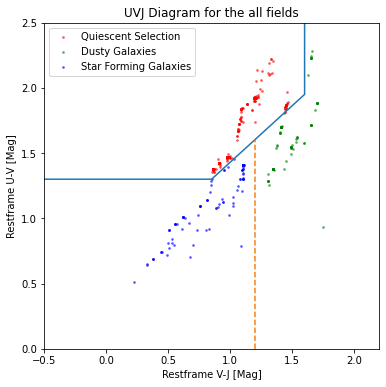

In [161]:
plot_uvj_nocategorise(export_df, export_df['VJ'], export_df['UV'])

# Tto check the veracity of this output, we can recheck

In [162]:
cdfs = export_df[export_df['ID'].str.contains('CDFS_16807')]

In [163]:
cdfs

ID        UV        VJ     zpk
1  CDFS_16807  0.509884  0.225754  1.5228

In [164]:
# For completness we can read in associated ZFOURGE files and plot them 
zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)

# as a dataframe
cdfs_recalcUVJids = pd.read_csv('datasets/zfourge/CDFS_RecalculatedUVJids_full.csv')
cosomos_recalcUVJids = pd.read_csv('datasets/zfourge/COSMOS_RecalculatedUVJids_full.csv')
uds_recalcUVJids = pd.read_csv('datasets/zfourge/UDS_RecalculatedUVJids_full.csv')


cdfs_recalcUVJids = cdfs_recalcUVJids.rename(columns={'ID':'id'})
cosomos_recalcUVJids = cosomos_recalcUVJids.rename(columns={'ID':'id'})
uds_recalcUVJids = uds_recalcUVJids.rename(columns={'ID':'id'})


c:\Users\Mitchell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mitchell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [165]:
# Merge the recalculated UVJ id's with the original dataframes
cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')

In [166]:
# Making one dataframe
frames = [cdfs_df, cosmos_df, uds_df]
zfourge_df = pd.concat(frames)


In [167]:
zfourge_df

recno         id      xpos      ypos    RAJ2000    DEJ2000  SE  isoArea  \
0      5886  CDFS_5886  4903.505  2218.433  53.061234 -27.882744   3    182.0   
1      5928  CDFS_5928  4865.992  2198.946  53.063004 -27.883558   3     68.0   
2      5972  CDFS_5972  4686.141  2261.246  53.071480 -27.880964   2    300.0   
3      6034  CDFS_6034  4700.024  2220.552  53.070828 -27.882660   3     30.0   
4      6049  CDFS_6049  4693.510  2218.716  53.071133 -27.882736   3     16.0   
...     ...        ...       ...       ...        ...        ...  ..      ...   
6307  22073  UDS_22073   893.519  4929.281  34.391899  -5.111294   0     58.0   
6308  22077  UDS_22077   529.058  4942.281  34.407147  -5.110752   3    161.0   
6309  22078  UDS_22078   982.913  4997.860  34.388161  -5.108436   0    167.0   
6310  22086  UDS_22086  4080.163  4739.570  34.258579  -5.119182   0    130.0   
6311  22089  UDS_22089  1936.303  4837.703  34.348274  -5.115107   2    489.0   

         FKsap  e_FKsap  ...        FH     e_FH  w_FH        FK     e_FK  \
0      3.09289  0.10266  ...       NaN      NaN   NaN       NaN      NaN   
1      3.42457  0.10040  ...       NaN      NaN   NaN       NaN      NaN   
2      8.39165  0.08648  ...       NaN      NaN   NaN       NaN      NaN   
3      0.51288  0.09210  ...       NaN      NaN   NaN       NaN      NaN   
4      0.33930  0.09267  ...       NaN      NaN   NaN       NaN      NaN   
...        ...      ...  ...       ...      ...   ...       ...      ...   
6307   1.03939  0.07892  ...   1.99784  0.30258   1.0   2.13933  0.21462   
6308   3.08937  0.08013  ...   5.38064  0.34642   1.0   7.73447  0.23584   
6309   5.49590  0.08340  ...  11.21525  0.33582   1.0  14.09349  0.24023   
6310   2.54756  0.06966  ...   6.33329  0.34497   1.0   6.28376  0.20835   
6311  14.79832  0.07613  ...  34.73541  0.46701   1.0  50.08019  0.32208   

      w_FK  FY  e_FY  w_FY  wminAll  
0      NaN NaN   NaN   NaN      NaN  
1      NaN NaN   NaN   NaN      NaN  
2      NaN NaN   NaN   NaN      NaN  
3      NaN NaN   NaN   NaN      NaN  
4      NaN NaN   NaN   NaN      NaN  
...    ...  ..   ...   ...      ...  
6307  0.77 NaN   NaN   0.0     0.67  
6308  0.85 NaN   NaN   0.0     0.65  
6309  0.76 NaN   NaN   0.0     0.60  
6310  1.06 NaN   NaN   0.0     0.86  
6311  0.82 NaN   NaN   0.0     0.72  

[20960 rows x 264 columns]

In [168]:
export_df

ID        UV        VJ     zpk
0    CDFS_22468  0.790783  1.090045  1.6739
1    CDFS_16807  0.509884  0.225754  1.5228
2    CDFS_11281  0.742645  0.450610  1.5864
3    CDFS_10413  0.646226  0.325980  1.5003
4    CDFS_13143  0.646008  0.326934  1.4925
..          ...       ...       ...     ...
434   UDS_13883  1.380354  0.863838  0.8058
435    UDS_1887  1.473628  0.972323  0.4364
436   UDS_17475  1.560590  1.375327  1.0974
437   UDS_19012  2.224120  1.325729  0.4129
438   UDS_14976  1.457816  0.973963  1.0550

[439 rows x 4 columns]

In [169]:
# Select subset of the zfourge_df where both id's are present
zfourge_df = zfourge_df[zfourge_df['id'].isin(export_df['ID'])]

In [170]:
# # Choose subset with only 1 field
# zfourge_df = zfourge_df[zfourge_df['field'] == 'COSMOS']

# # Likewise for the export_df
# export_df = export_df[export_df['ID'].isin(zfourge_df['id'])]


Number of Quiescent Galaxies: 133
Number of Dusty Galaxies: 67
Number of Star Forming Galaxies: 239


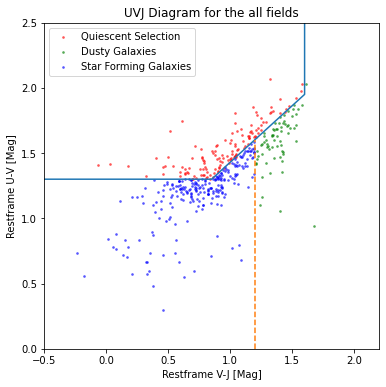

In [171]:
# Plot the UVJ diagram for the ZFOURGE galaxies
plot_uvj_nocategorise(zfourge_df, zfourge_df['VJ'], zfourge_df['UV'])

Number of Quiescent Galaxies: 260
Number of Dusty Galaxies: 81
Number of Star Forming Galaxies: 98


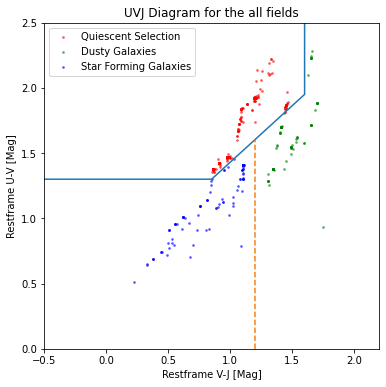

In [172]:
# Plotting this using my quiescent transitions calculated from ollie's data
plot_uvj_nocategorise(export_df, export_df['VJ'], export_df['UV'])

Number of Quiescent Galaxies: 439
Number of Dusty Galaxies: 0
Number of Star Forming Galaxies: 0


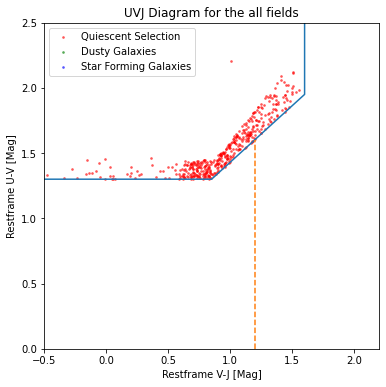

In [173]:
# Now plotting using my original selection of transition ID's
# using the VJ_0 and UV_0 columns
plot_uvj_nocategorise(zfourge_df, zfourge_df['VJ_0'], zfourge_df['UV_0'])

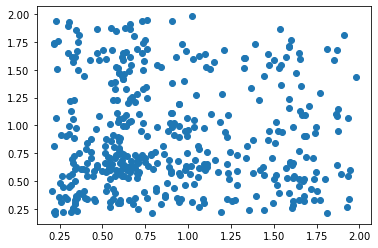

In [174]:
# For completeness plot the redshifts I brought over from my export_df against the ones in the zfourge_df
plt.scatter(zfourge_df['zpk'], export_df['zpk'])
plt.show()

In [175]:
y = zfourge_df[['zpk', 'id']].sort_values(by='id')




In [176]:
x = export_df[['zpk', 'ID']].sort_values(by='ID')


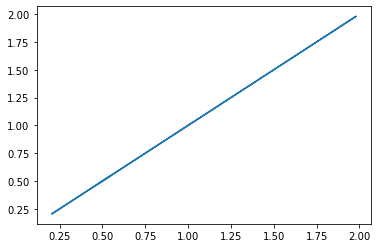

In [177]:
plt.plot(x['zpk'], y['zpk'])    # straight line indicates that all redshifts are matched
plt.show()
# plot the UV entries for each export_df and zfourge_df

# likewise for VJ, all on same graph


In [178]:
export_df

ID        UV        VJ     zpk
0    CDFS_22468  0.790783  1.090045  1.6739
1    CDFS_16807  0.509884  0.225754  1.5228
2    CDFS_11281  0.742645  0.450610  1.5864
3    CDFS_10413  0.646226  0.325980  1.5003
4    CDFS_13143  0.646008  0.326934  1.4925
..          ...       ...       ...     ...
434   UDS_13883  1.380354  0.863838  0.8058
435    UDS_1887  1.473628  0.972323  0.4364
436   UDS_17475  1.560590  1.375327  1.0974
437   UDS_19012  2.224120  1.325729  0.4129
438   UDS_14976  1.457816  0.973963  1.0550

[439 rows x 4 columns]

In [179]:
# Save and export this for comparison
# save to outputs
export_df.to_csv('outputs/cigale_colours_ids.csv', index=False)

In [180]:
# See the names of all of the column headings in the df
best_fit_seds[0].columns

Index(['wavelength', 'Fnu', 'L_lambda_total', 'stellar.old', 'stellar.young',
       'nebular.absorption_old', 'nebular.absorption_young',
       'nebular.lines_old', 'nebular.lines_young', 'nebular.continuum_old',
       'nebular.continuum_young', 'attenuation.stellar.old',
       'attenuation.stellar.young', 'attenuation.nebular.lines_old',
       'attenuation.nebular.lines_young', 'attenuation.nebular.continuum_old',
       'attenuation.nebular.continuum_young', 'dust', 'agn.SKIRTOR2016_torus',
       'agn.SKIRTOR2016_polar_dust', 'agn.SKIRTOR2016_disk', 'igm', 'Snu',
       'nuSnu', 'Flambda', 'lambda (Angstroms)',
       'Total Flux (erg/s/cm^2/Angstrom)'],
      dtype='object')

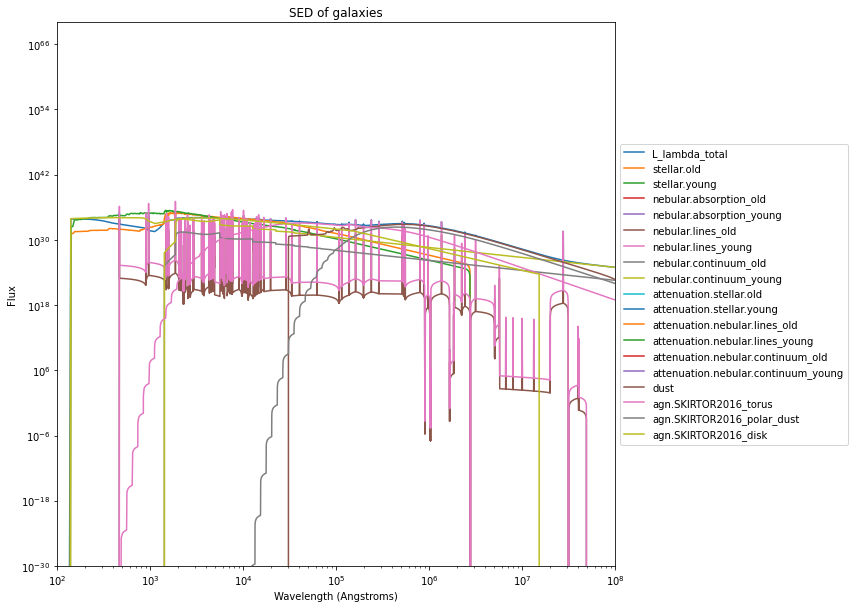

In [181]:
# Now that we have some type of SED output, we can attempt to try to convert the CIGALE decomposed outputs#
# Begin by attempting to plot L_lambda_total in a similar manner to before 
n=0
df = best_fit_seds[n]

# Aside fom the first 3, and the last 4 columns, plot the rest wavelength against the column

# iterate throught the columns, and plot the values
plt.figure(figsize=(10, 10))
for i in range(2, len(df.columns)-6):
    plt.loglog(df['wavelength'], df[df.columns[i]], label=df.columns[i])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim(1e2, 1e8)
plt.ylim(1e-30, 1e70)
plt.title('SED of galaxies')


# Plot the legend off to the side
# Create a legend with the unique labels
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [190]:
# a type 1 AGN would consist of the following components
# - AGN disk
# - maybe AGN polar dust


# Whereas a type 2 would consist of all components in varying quantities
# - AGN disk
# - AGN torus
# - AGN polar dust
# Print the column names

for col in best_fit_seds[0].columns:
    print(col)



wavelength
Fnu
L_lambda_total
stellar.old
stellar.young
nebular.absorption_old
nebular.absorption_young
nebular.lines_old
nebular.lines_young
nebular.continuum_old
nebular.continuum_young
attenuation.stellar.old
attenuation.stellar.young
attenuation.nebular.lines_old
attenuation.nebular.lines_young
attenuation.nebular.continuum_old
attenuation.nebular.continuum_young
dust
agn.SKIRTOR2016_torus
agn.SKIRTOR2016_polar_dust
agn.SKIRTOR2016_disk
igm
Snu
nuSnu
Flambda
lambda (Angstroms)
Total Flux (erg/s/cm^2/Angstrom)


wavelength
Fnu
L_lambda_total
stellar.old
stellar.young
nebular.absorption_old
nebular.absorption_young
nebular.lines_old
nebular.lines_young
nebular.continuum_old
nebular.continuum_young
attenuation.stellar.old
attenuation.stellar.young
attenuation.nebular.lines_old
attenuation.nebular.lines_young
attenuation.nebular.continuum_old
attenuation.nebular.continuum_young
dust
agn.SKIRTOR2016_torus
agn.SKIRTOR2016_polar_dust
agn.SKIRTOR2016_disk
igm
Snu
nuSnu
Flambda
lambda (Angstroms)

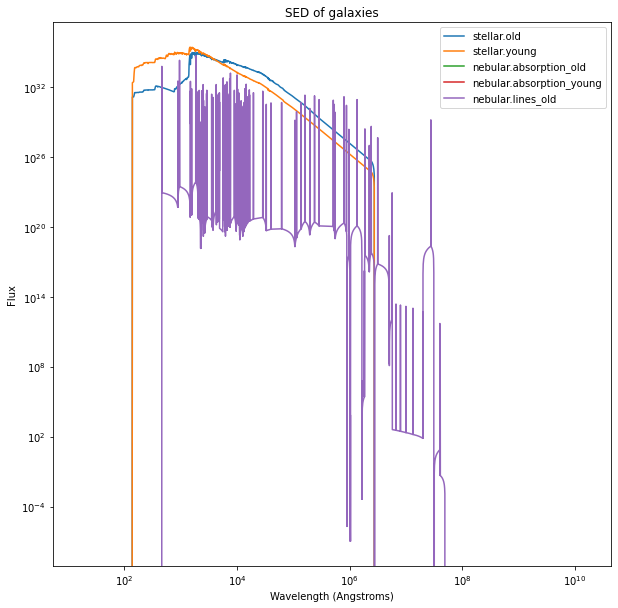

In [183]:
# attempting to plot the new values

# Subsetdf of only agn components


# Plotting only the AGN components
plt.figure(figsize=(10, 10))
for i in range(3, 8):
    plt.loglog(df['wavelength'], df[df.columns[i]], label=df.columns[i])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
#plt.xlim(1e2, 1e8)
#plt.ylim(1e-30, 1e70)
plt.title('SED of galaxies')
plt.legend()
plt.show()



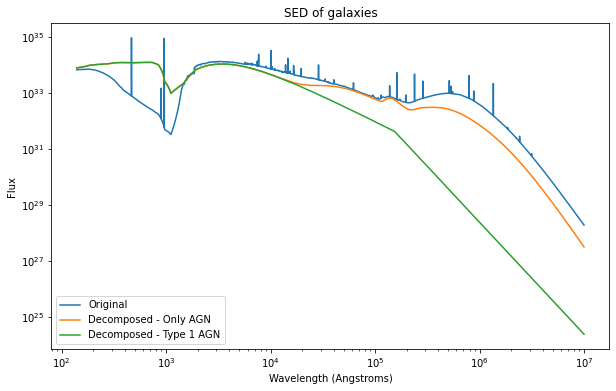

In [225]:
# Plot just the total value of L_lambda_total

# Drop the zero values
new_df = df[df['L_lambda_total'] > 10**-7].copy()

# Create an adjust L_lambda to plot against
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total']


# Remove the young and old stellar components
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['stellar.old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['stellar.young']


# Remove the absopriton and emission lines

# Absorption
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.absorption_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.absorption_young']

# Emission
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.lines_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.lines_young']


# Removing the dust component
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['dust']


# Removing the galactic continuum
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.continuum_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.continuum_young']

# Removing the attentuated components
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.stellar.old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.stellar.young']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.lines_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.lines_young']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.continuum_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.continuum_young']


# Remove the igm
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['igm']


# To ensure this is done correctly, we also are choosing to consider simply just the AGN components 
# where the the values are within a range of 10^2 - 10^7
new_df = new_df[(new_df['wavelength'] > 10**-2) & (new_df['wavelength'] < 10**7)]



# Optionally we can choose to remove certain parts of the SED, such as the dust component
# the torus component living the disk component for type 1

# Type 1
# Remove the dust component
# agn.SKIRTOR2016_polar_dust
# agn.SKIRTOR2016_disk

# Removing polar dust
new_df['L_lambda_total_decomposed_type_1'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_polar_dust']

# Removing torus
new_df['L_lambda_total_decomposed_type_1'] = new_df['L_lambda_total_decomposed_type_1'] - new_df['agn.SKIRTOR2016_torus']






# normalise the values using the integral of the total flux of the original SED
# We will use the trapezoidal rule to calculate the integral of the total flux
# We will then divide the decomposed values by this integral to normalise the values
integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed'], new_df['wavelength'])

# Scaling factor
#scaling_factor = integral_total/integral_decomposed

# Normalise the decomposed values
#new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] * scaling_factor



plt.figure(figsize=(10, 6))
plt.loglog(new_df['wavelength'], new_df['L_lambda_total'], label='Original')
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed'], label='Decomposed - Only AGN')

# Additionally try to plot the AGN component of a type 1
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed_type_1'], label='Decomposed - Type 1 AGN')

plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('SED of galaxies')
plt.legend()
plt.show()


So now that we have seen this we know that we can easily just calculate the the galaxy with the AGN components only. We will therefore like to take a similar approach where we choose to only consider the galaxies galactic components. 
by considering only this, in a more rigiours way we should hopefully be able to see what a 'clean' galaxy looks like. From here, with the decomposed SED we should have two components. An AGN component, and simply a galactic component with no AGN modelled into it.

We would like to subtract the AGN from all of the galaxies, and then replot these galaxies as required in UVJ space. Let us begin by attempting to create a galaxy with only the galactic components and no AGN

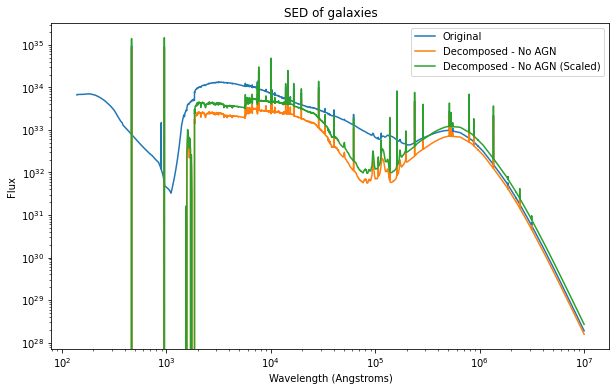

In [234]:
# Drop the zero values
new_df = df[df['L_lambda_total'] > 10**-7].copy()

# Create an adjust L_lambda to plot against
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total']


# To ensure this is done correctly, we also are choosing to consider simply just the AGN components 
# where the the values are within a range of 10^2 - 10^7
new_df = new_df[(new_df['wavelength'] > 10**-2) & (new_df['wavelength'] < 10**7)]



# We would like to remove the AGN from the galaxy if possible

# Removing polar dust
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_polar_dust']

# Removing torus
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_torus']

# Removing the accretion disk
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_disk']




# normalise the values using the integral of the total flux of the original SED
# We will use the trapezoidal rule to calculate the integral of the total flux
# We will then divide the decomposed values by this integral to normalise the values
integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed'], new_df['wavelength'])

# Scaling factor
scaling_factor = integral_total/integral_decomposed

# Normalise the decomposed values <- Unsure if we should be doing this, but for complenetess it may be a good idea
new_df['L_lambda_total_decomposed_Scaled'] = new_df['L_lambda_total_decomposed'] * scaling_factor




plt.figure(figsize=(10, 6))
plt.loglog(new_df['wavelength'], new_df['L_lambda_total'], label='Original')
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed'], label='Decomposed - No AGN')
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed_Scaled'], label='Decomposed - No AGN (Scaled)')

plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('SED of galaxies')
plt.legend()
plt.show()


In [278]:
# Now that we have the general idea of how to decompose the SEDs, we can attempt to do this for all of the galaxies
# in the best_fit_seds list
# We will create a function that will do this for us

def decompose_agn_seds(best_fit_seds):
    # Create a list to store the decomposed SEDs
    decomposed_seds = []
    
    # Iterate through the best_fit_seds
    for i in range(len(best_fit_seds)):
        new_df = best_fit_seds[i].copy()
        
        # Drop the zero values - maybe include this potentially
       # new_df = df[df['L_lambda_total'] > 10**-7].copy()

        # AGN components - Remove the galaxy component
        # Create an adjust L_lambda to plot against
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total']

        # Remove the young and old stellar components
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['stellar.old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['stellar.young']


        # Remove the absopriton and emission lines

        # Absorption
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.absorption_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.absorption_young']

        # Emission
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.lines_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.lines_young']


        # Removing the dust component
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['dust']


        # Removing the galactic continuum
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.continuum_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.continuum_young']

        # Removing the attentuated components
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.stellar.old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.stellar.young']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.lines_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.lines_young']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.continuum_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.continuum_young']


        # Remove the igm
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['igm']
        
        integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
        integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed_AGN'], new_df['wavelength'])

        # Scaling factor
        scaling_factor = integral_total/integral_decomposed

        # Normalise the decomposed values <- Unsure if we should be doing this, but for complenetess it may be a good idea
        new_df['L_lambda_total_decomposed_AGN_Scaled'] = new_df['L_lambda_total_decomposed_AGN'] * scaling_factor
        
        

        # Galaxy component - Remove the AGN Component
        # Create an adjust L_lambda to plot against
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total']

        # To ensure this is done correctly, we also are choosing to consider simply just the AGN components 
        # where the the values are within a range of 10^2 - 10^7
        new_df = new_df[(new_df['wavelength'] > 10**-2) & (new_df['wavelength'] < 10**7)]

        # We would like to remove the AGN from the galaxy if possible

        # Removing polar dust
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_polar_dust']

        # Removing torus
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_torus']

        # Removing the accretion disk
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_disk']

        # normalise the values using the integral of the total flux of the original SED
        # We will use the trapezoidal rule to calculate the integral of the total flux
        # We will then divide the decomposed values by this integral to normalise the values
        integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
        integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed'], new_df['wavelength'])

        # Scaling factor
        scaling_factor = integral_total/integral_decomposed

        # Normalise the decomposed values <- Unsure if we should be doing this, but for complenetess it may be a good idea
        new_df['L_lambda_total_decomposed_Scaled'] = new_df['L_lambda_total_decomposed'] * scaling_factor
        
        decomposed_seds.append(new_df)
        
    return decomposed_seds 



    

In [279]:
decomposed_seds = decompose_agn_seds(best_fit_seds)

In [280]:
decomposed_seds[0]

wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
3456  9.944754e+06  0.005204    1.918748e+28          0.0            0.0   
3457  9.952217e+06  0.005192    1.911533e+28          0.0            0.0   
3458  9.959681e+06  0.005180    1.904317e+28          0.0            0.0   
3459  9.967145e+06  0.005168    1.897102e+28          0.0            0.0   
3460  9.974609e+06  0.005156    1.889887e+28          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0       0.000000e+00   
1                        0.0                       0.0       0.000000e+00   
2                        0.0                       0.0       0.000000e+00   
3                        0.0                       0.0       0.000000e+00   
4                        0.0                       0.0       0.000000e+00   
...                      ...                       ...                ...   
3456                     0.0                       0.0       1.517128e+13   
3457                     0.0                       0.0       3.189368e+12   
3458                     0.0                       0.0       2.963140e+10   
3459                     0.0                       0.0       1.216647e+07   
3460                     0.0                       0.0       2.207711e+02   

      nebular.lines_young  nebular.continuum_old  ...  igm       Snu  \
0            0.000000e+00           0.000000e+00  ... -0.0  0.000000   
1            0.000000e+00           0.000000e+00  ... -0.0  0.000000   
2            0.000000e+00           0.000000e+00  ... -0.0  0.000000   
3            0.000000e+00           0.000000e+00  ... -0.0  0.000000   
4            0.000000e+00           0.000000e+00  ... -0.0  0.000000   
...                   ...                    ...  ...  ...       ...   
3456         3.648104e+15           2.462445e+24  ...  0.0  0.000002   
3457         7.669195e+14           2.459095e+24  ...  0.0  0.000002   
3458         7.125204e+12           2.455746e+24  ...  0.0  0.000002   
3459         2.925566e+09           2.452397e+24  ...  0.0  0.000002   
3460         5.308691e+04           2.449048e+24  ...  0.0  0.000002   

              nuSnu       Flambda  lambda (Angstroms)  \
0          0.000000  0.000000e+00        1.529788e+01   
1          0.000000  0.000000e+00        1.756432e+01   
2          0.000000  0.000000e+00        2.016653e+01   
3          0.000000  0.000000e+00        2.315428e+01   
4          0.000000  0.000000e+00        2.658467e+01   
...             ...           ...                 ...   
3456  587091.269782  5.903527e-25        9.944754e+06   
3457  585322.530767  5.881328e-25        9.952217e+06   
3458  583550.477898  5.859128e-25        9.959681e+06   
3459  581775.111176  5.836928e-25        9.967145e+06   
3460  579996.430599  5.814729e-25        9.974609e+06   

      Total Flux (erg/s/cm^2/Angstrom)  L_lambda_total_decomposed  \
0                         0.000000e+00               0.000000e+00   
1                         0.000000e+00               0.000000e+00   
2                         0.000000e+00               0.000000e+00   
3                         0.000000e+00               0.000000e+00   
4                         0.000000e+00               0.000000e+00   
...                                ...                        ...   
3456                      5.903527e-25               1.602218e+28   
3457                      5.881328e-25               1.596259e+28   

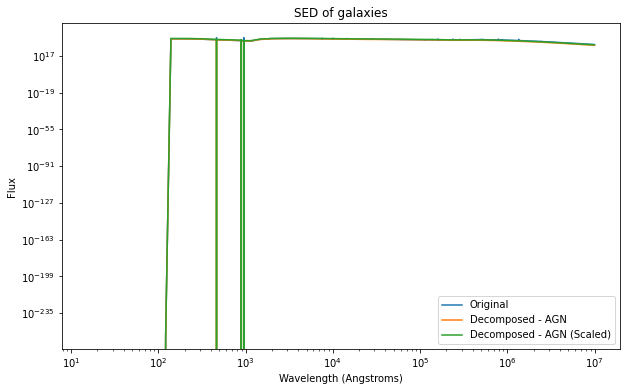

In [281]:
# plotting the first decomposed SED
plt.figure(figsize=(10, 6))



# original sed
plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total'], label='Original')

# Decomposed SED - Galaxy Components 
#plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed'], label='Decomposed - No AGN')
#plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed_Scaled'], label='Decomposed - No AGN (Scaled)')

# Decomposed SED - AGN Components
plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed_AGN'], label='Decomposed - AGN')
plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed_AGN_Scaled'], label='Decomposed - AGN (Scaled)')



plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('SED of galaxies')



plt.legend()
plt.show()


In [297]:
# Finally we can plot our original uvj diagram with l_lambda to see the uvj results
# Doing a quick plot of the original UVJ colour space using the undecomposed SED
uv_galaxy_colours = []
vj_galaxy_colours = []


for sed_data in decomposed_seds:
    
    # Create an SED object using astSED    
    wl = sed_data['lambda (Angstroms)']
    fl = sed_data['L_lambda_total_decomposed']
    sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
    # create the uv and vj colours
    uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    
    # Append colours to list
    uv_galaxy_colours.append(uv)
    vj_galaxy_colours.append(vj)



In [298]:
uv_galaxy_colours

[0.9706202652401856,
 0.5098839644323476,
 0.7425039824902058,
 0.6459387116828452,
 0.6459387116828168,
 0.7425039824902058,
 0.9131742119787987,
 0.8123977330138814,
 0.9131742119787987,
 0.7425039824902058,
 0.6891869033142939,
 0.9559972620606061,
 0.9559972620606061,
 0.6891869033142939,
 0.9559972620606061,
 0.6891869033142939,
 0.9559972620606061,
 1.0088359492431636,
 0.7022743751034426,
 1.0760755343851542,
 1.0235270968607608,
 1.1062975179279562,
 1.0088359492431493,
 2.1394784074620787,
 1.0901791516627384,
 1.0088359492431493,
 1.0088359492431493,
 1.3803541573013263,
 1.8349121454429849,
 1.8698824276508077,
 1.4107443449543666,
 1.9714731826119447,
 1.3803541573013263,
 1.3803541573013405,
 1.473732715364065,
 1.4107443449543666,
 1.8838266064824296,
 1.4107443449543666,
 1.3803541573013405,
 1.3803541573013263,
 1.3806436088702299,
 1.3803541573013405,
 1.4672599967741462,
 1.1465123358699714,
 1.4107443449543666,
 1.3803541573013263,
 1.4107443449543666,
 1.42210678318

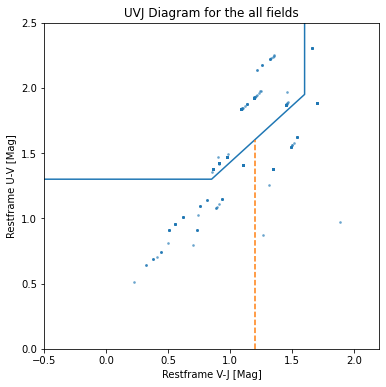

In [299]:
# Plotting this in UVJ
plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0



# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='All Galaxies')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.show()